Schwabish, J. (2014). An economist’s guide to visualizing data. Washington, DC: Urban Institute. Recuperado de https://surf.econ.uic.edu/wp-content/uploads/sites/882/2023/05/Schwabish-Jonathan.-An-Economists-Guide-to-Visualizing-Data-2014.pdf

Gráfico salvo em: dumbbell.png


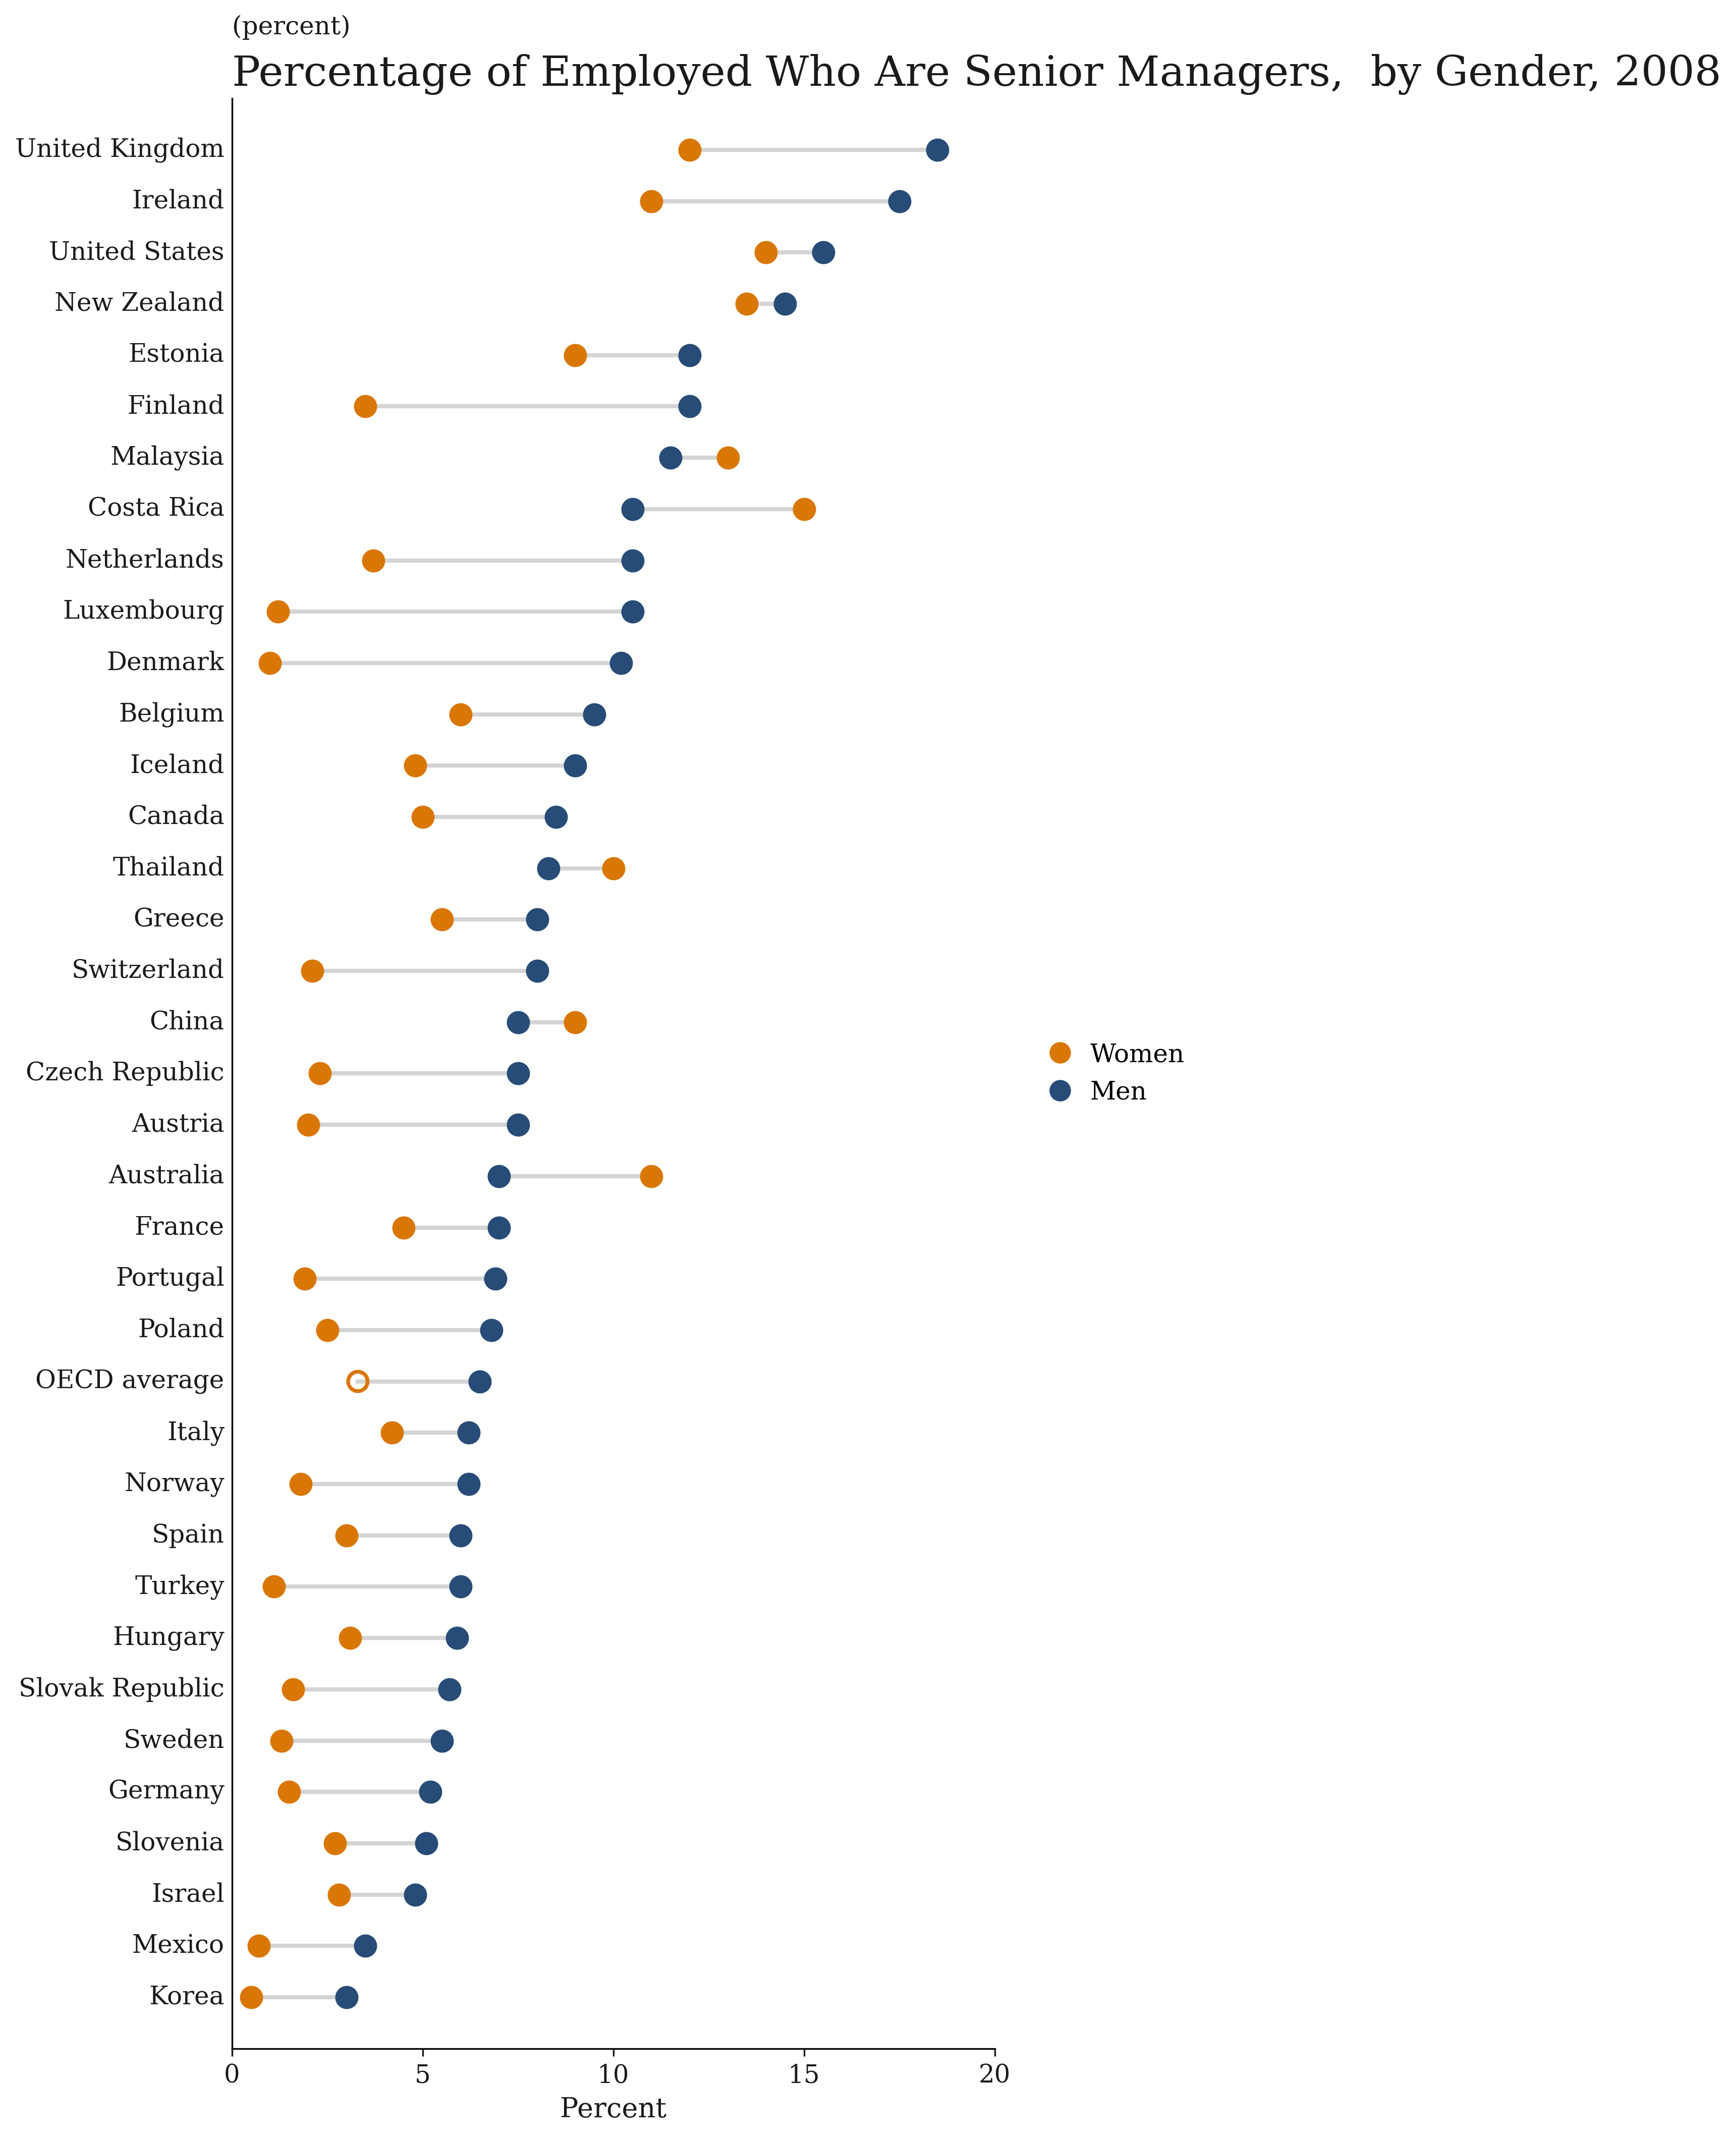

In [1]:
# -*- coding: utf-8 -*-
"""
Gráfico 'dumbbell' (Mulheres vs. Homens por país), com:
- tamanho automático da figura;
- legenda posicionada à DIREITA, fora do gráfico, sem sobrepor;
- espaço reservado na margem direita para a legenda.
"""

import math
import numpy as np
import matplotlib.pyplot as plt

# ========================= 1) PARÂMETROS =========================
STYLE = {
    "font_family": "serif",
    "font_serif": ["DejaVu Serif", "Times New Roman", "Times"],

    "title": "Percentage of Employed Who Are Senior Managers,  by Gender, 2008",
    "subtitle": "(percent)",
    "title_align": "left",
    "title_size": 20,
    "subtitle_size": 12,

    "women_color":  "#d97706",   # laranja
    "men_color":    "#274c77",   # azul
    "line_color":   "0.83",      # conector
    "text_color":   "0.10",

    "tick_size": 12,
    "label_size": 13,
    "legend_size": 12,
    "marker_size_women": 85,
    "marker_size_men":   85,
    "connector_lw": 2.0,
    "marker_edge_lw": 1.8,

    # Layout interno (frações da figura)
    "left": 0.24,
    "right": 0.96,          # usado quando a legenda não está à direita
    "bottom": 0.07,
    "top": 0.90,

    # >>> LEGENDA À DIREITA (sem sobrepor)
    "legend_where": "outside_right_center",  # fixa à direita
    "legend_right_space": 0.20,  # fração reservada para a legenda (20% da largura)
    "legend_gap": 0.02,          # gap horizontal entre eixo e legenda
}

XAXIS = {"xlim": (0, 20), "xticks": np.arange(0, 21, 5), "xlabel": "Percent"}
OPEN_MARKERS = {"women": {"OECD average"}, "men": set()}
ORDER_BY = "men"

# ========================= 2) DADOS DEMO (substitua pelos seus) =========================
RAW_DATA = [
    ("United States", 14.0, 15.5), ("New Zealand", 13.5, 14.5),
    ("United Kingdom",12.0, 18.5), ("Ireland", 11.0, 17.5),
    ("Malaysia", 13.0, 11.5), ("Costa Rica", 15.0, 10.5),
    ("Thailand", 10.0, 8.3), ("China", 9.0, 7.5), ("Australia", 11.0, 7.0),
    ("Estonia", 9.0, 12.0), ("Belgium", 6.0, 9.5), ("Greece", 5.5, 8.0),
    ("Canada", 5.0, 8.5), ("Iceland", 4.8, 9.0), ("France", 4.5, 7.0),
    ("Italy", 4.2, 6.2), ("Netherlands", 3.7, 10.5), ("Finland", 3.5, 12.0),
    ("OECD average", 3.3, 6.5), ("Hungary", 3.1, 5.9), ("Spain", 3.0, 6.0),
    ("Israel", 2.8, 4.8), ("Slovenia", 2.7, 5.1), ("Poland", 2.5, 6.8),
    ("Czech Republic", 2.3, 7.5), ("Switzerland", 2.1, 8.0),
    ("Austria", 2.0, 7.5), ("Portugal", 1.9, 6.9), ("Norway", 1.8, 6.2),
    ("Slovak Republic", 1.6, 5.7), ("Germany", 1.5, 5.2), ("Sweden", 1.3, 5.5),
    ("Luxembourg", 1.2, 10.5), ("Turkey", 1.1, 6.0), ("Denmark", 1.0, 10.2),
    ("Mexico", 0.7, 3.5), ("Korea", 0.5, 3.0),
]

# ========================= 3) HELPERS =========================
def order_rows(rows, key="men"):
    if key == "men":   return sorted(rows, key=lambda r: r[2], reverse=True)
    if key == "women": return sorted(rows, key=lambda r: r[1], reverse=True)
    if key == "max":   return sorted(rows, key=lambda r: max(r[1], r[2]), reverse=True)
    if key == "min":   return sorted(rows, key=lambda r: min(r[1], r[2]), reverse=True)
    return rows

def auto_figsize(n_rows: int):
    width = 9.0
    height = max(7.0, 0.36 * n_rows + 2.2)
    return (width, height)

def build_legend_right(fig, ax, style):
    """Legenda à DIREITA do eixo, dentro da figura (em área reservada)."""
    from matplotlib.lines import Line2D
    handles = [
        Line2D([0], [0], marker='o', color='none',
               markerfacecolor=style["women_color"], markeredgecolor=style["women_color"],
               markersize=math.sqrt(style["marker_size_women"]), label="Women"),
        Line2D([0], [0], marker='o', color='none',
               markerfacecolor=style["men_color"], markeredgecolor=style["men_color"],
               markersize=math.sqrt(style["marker_size_men"]), label="Men"),
    ]
    # Borda direita do eixo em coords da figura
    bbox = ax.get_position()
    right = bbox.x1
    bottom, top = bbox.y0, bbox.y1

    # Posição alvo: um pouco à direita do eixo, centrado verticalmente
    x = right + style["legend_gap"]
    y = 0.5 * (bottom + top)

    fig.legend(
        handles=handles,
        frameon=False,
        ncol=1,
        loc="center left",
        bbox_to_anchor=(x, y),
        bbox_transform=fig.transFigure,
        fontsize=style["legend_size"],
        handlelength=1.2, handletextpad=0.6, columnspacing=1.0,
    )

# ========================= 4) PLOT =========================
def plot_dumbbell(rows, style=STYLE, xaxis=XAXIS, open_markers=OPEN_MARKERS,
                  order_by=ORDER_BY, save_path="senior_managers_gender.png", dpi=300):
    # Tipografia
    plt.rcParams.update({"font.family": style["font_family"], "font.serif": style["font_serif"]})

    rows = order_rows(rows, key=order_by)
    n = len(rows)
    fig, ax = plt.subplots(figsize=auto_figsize(n), dpi=dpi)

    # >>> se a legenda for à direita, reservamos uma faixa para ela
    if "outside_right" in style["legend_where"]:
        right_eff = 1.0 - style["legend_right_space"]
    else:
        right_eff = style["right"]

    fig.subplots_adjust(left=style["left"], right=right_eff,
                        bottom=style["bottom"], top=style["top"])

    # Y
    y = np.arange(n)
    ax.set_ylim(-1, n)
    ax.invert_yaxis()
    ax.tick_params(axis="y", left=False, labelleft=False)

    # X
    ax.set_xlim(*xaxis["xlim"])
    ax.set_xticks(xaxis["xticks"])
    ax.set_xlabel(xaxis["xlabel"], fontsize=style["label_size"], color=style["text_color"])
    ax.tick_params(axis="x", labelsize=style["tick_size"], colors=style["text_color"])

    # Spines e linha base
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.axvline(x=xaxis["xlim"][0], color="0.88", lw=1.0, zorder=0)

    # Dumbbells + rótulos de países
    left_label_x = xaxis["xlim"][0] - 0.2
    for i, (country, women, men) in enumerate(rows):
        ax.plot([women, men], [y[i], y[i]],
                color=style["line_color"], lw=style["connector_lw"], zorder=1)

        face_w = "none" if country in open_markers["women"] else style["women_color"]
        ax.scatter([women], [y[i]], s=style["marker_size_women"],
                   facecolors=face_w, edgecolors=style["women_color"],
                   linewidths=style["marker_edge_lw"], zorder=3)

        face_m = "none" if country in open_markers["men"] else style["men_color"]
        ax.scatter([men], [y[i]], s=style["marker_size_men"],
                   facecolors=face_m, edgecolors=style["men_color"],
                   linewidths=style["marker_edge_lw"], zorder=3)

        ax.text(left_label_x, y[i], country, ha="right", va="center",
                fontsize=style["tick_size"], color=style["text_color"])

    # Título + subtítulo
    if style["title_align"] == "left":
        ax.set_title(style["title"], loc="left", pad=6,
                     fontsize=style["title_size"], color=style["text_color"])
        ax.text(0.0, 1.03, style["subtitle"], transform=ax.transAxes,
                ha="left", va="bottom", fontsize=style["subtitle_size"], color=style["text_color"])
    else:
        ax.set_title(style["title"], loc="center", pad=6,
                     fontsize=style["title_size"], color=style["text_color"])
        ax.text(0.5, 1.03, style["subtitle"], transform=ax.transAxes,
                ha="center", va="bottom", fontsize=style["subtitle_size"], color=style["text_color"])

    # >>> LEGENDA À DIREITA (em área reservada, sem sobrepor)
    build_legend_right(fig, ax, style)

    fig.savefig(save_path, dpi=dpi)  # não use bbox_inches='tight' (já reservamos espaço)
    print(f"Gráfico salvo em: {save_path}")
    return fig, ax


# ========================= 5) EXECUTAR =========================
if __name__ == "__main__":
    plot_dumbbell(RAW_DATA, save_path="dumbbell.png")


In [2]:
### ajustes do gráfico shap para ficar formatado no grid
from PIL import Image

# Caminho da imagem original (que será substituída)
image_path = "dumbbell.png"

# Tamanho desejado: 5 x 5 polegadas a 300 dpi = 1500 x 1500 pixels
new_size = (1500, 1500)

# Abre a imagem original
img = Image.open(image_path)

# Redimensiona com método de alta qualidade (compatível com Pillow >= 10)
try:
    img = img.resize(new_size, Image.Resampling.LANCZOS)
except AttributeError:
    # Compatível com Pillow < 10
    img = img.resize(new_size, Image.LANCZOS)

# Salva sobrescrevendo a original
img.save(image_path)